In [15]:
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, precision_recall_fscore_support, confusion_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.isna().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

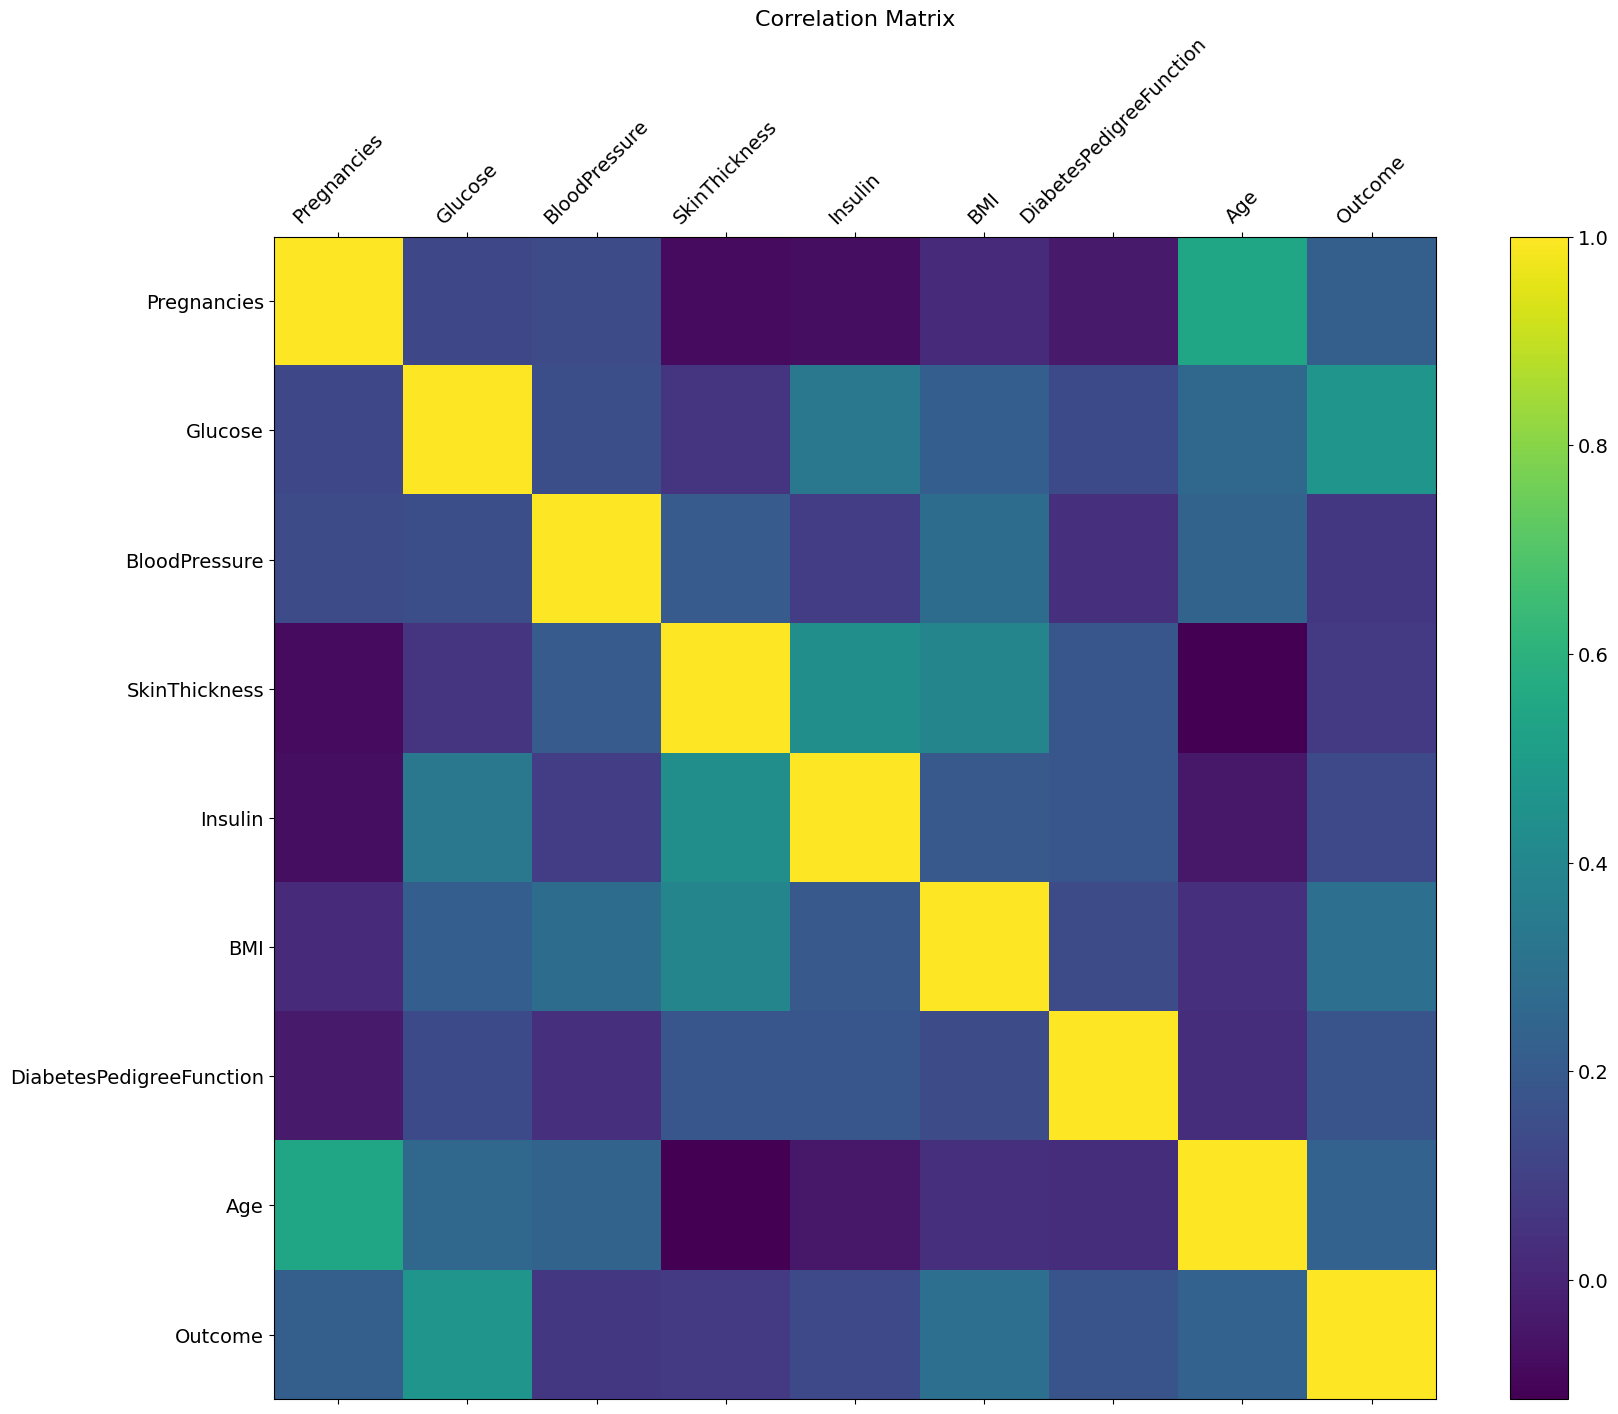

In [8]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [9]:
df[["Outcome"]].value_counts(normalize = True)

Outcome
0          0.651042
1          0.348958
Name: proportion, dtype: float64

In [10]:
df.corr()["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [36]:
scaler = StandardScaler()
features = df.drop("Outcome", axis = 1)
target = df["Outcome"]
scaled_df = scaler.fit_transform(features)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [13]:
outputs = model.predict(X_test)
accuracy_score(y_test, outputs)

0.7337662337662337

In [14]:
cv = cross_val_score(model, X_test, y_test, scoring=make_scorer(accuracy_score), cv = 10)
class_metrics = precision_recall_fscore_support(y_test, outputs)


In [11]:
print(f"Cross val score: {cv}")
print (f"Precision, recall: {class_metrics}")

Cross val score: [0.75       0.6875     0.875      0.6875     0.46666667 0.8
 0.8        0.66666667 0.73333333 0.66666667]
Precision, recall: (array([0.76923077, 0.64      ]), array([0.81632653, 0.57142857]), array([0.79207921, 0.60377358]), array([98, 56]))


In [25]:
new_model = RandomForestClassifier()
new_model.fit(X_train, y_train)
RFC_outputs = model.predict(X_test)
cv_score = cross_val_score(new_model,X_train, y_train)


cv_avg = sum(cv_score)/len(cv_score)*100
print(f"Cross validation average: {cv_avg}")

Cross validation average: 76.05624416899907


In [31]:
RFC_metrics = precision_recall_fscore_support(y_test, RFC_outputs)
RFC_metrics[1]


print(f"Precision on Random Forest Classifier: {RFC_metrics[0]}")
print(f"Recall on Random Forest Classifier: {RFC_metrics[1]}")
print(f"F1 Score on Random Forest Classifier: {RFC_metrics[2]}")

np.unique(y_test)


Precision on Random Forest Classifier: [0.74545455 0.70454545]
Recall on Random Forest Classifier: [0.86315789 0.52542373]
F1 Score on Random Forest Classifier: [0.8        0.60194175]


array([0, 1])

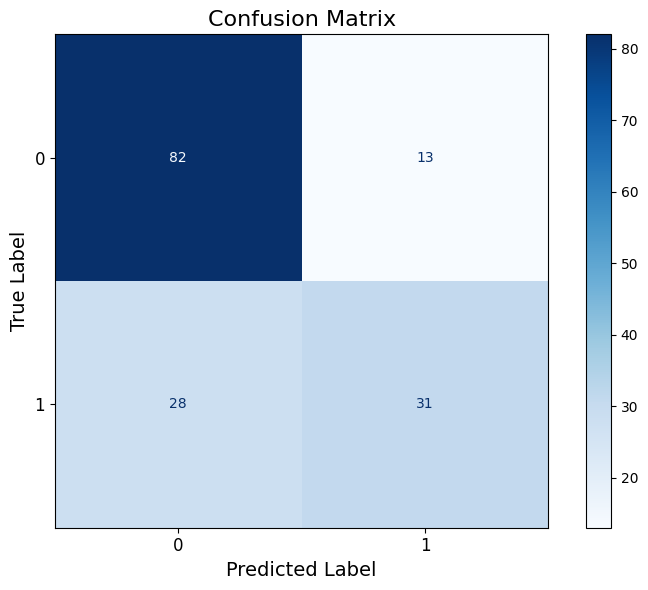

In [35]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, RFC_outputs)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=[0, 1])

fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='Blues', colorbar=True)

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()
plt.show()